In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')

In [14]:
# import technology table
def return_technology():
    technology = pd.read_csv(f'./../data/technology.csv')
    return technology

In [15]:
# import energy data
def return_energy_consumption(scenario):
    energy_consumption = pd.read_excel(f'./../TEAM-Kenya_data_out/scenarios-out/VEEMEIM_QF{scenario}.xlsx')  
    return energy_consumption

In [16]:
# import calorific values
def return_calorificvalues():
    cal = pd.read_excel(f'./data/fuel.xlsx')
    return cal

In [17]:
years = range(2015, 2051)
scenarios = ['OMOKA', 'ELECTRICDREAMS', 'KUJINAO', 'STREETFIGHTING']

In [18]:
consumption_by_scenario = {}

for scenario in scenarios:
    
    consumption = return_energy_consumption(scenario)
        
    consumption_by_year = {}
    for year in years:
        
        consumption_by_fuel = {}
        for fuelID in consumption.FuelID.unique():
            
            fuel_consumed = consumption[(consumption['Year'] == year) & (consumption['FuelID'] == fuelID)]['VEEMQF_Value'].sum() * 1e6  # litres or kWh
            
            consumption_by_fuel[fuelID] = fuel_consumed
            
        consumption_by_year[year] = consumption_by_fuel
            
    consumption_by_scenario[scenario] = consumption_by_year

In [19]:
chart_data = {}

for scenario in scenarios:
    
    series = []
    for year in years:
        series.append(sum(consumption_by_scenario[scenario][year].values()))
    
    chart_data[scenario] = series
    

In [20]:
chart_data_by_fuel = {}

for scenario in scenarios:
    data_by_fuel = {}
    for fuelID in [1,2,12]:
        
        series = []
        for year in years:
            series.append(consumption_by_scenario[scenario][year][fuelID])
        
        data_by_fuel[fuelID] = series
        
    chart_data_by_fuel[scenario] = data_by_fuel

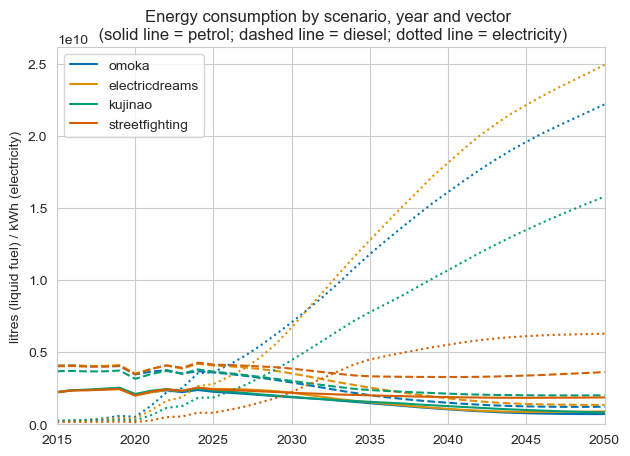

In [21]:
fig, ax = plt.subplots()
clrs = sns.color_palette('colorblind')
legend_labels = {'omoka':'Omoka', 'electricdreams': 'Electric Dreams', 'kujinao': 'Kujinao', 'streetfighting': 'Streetfighting'}
lnstls = ['-', '--', ':']

cnt = 0
for scenario in scenarios:
    lnstl_cnt = 0
    
    for fuelID in [1,2,12]:
        if (lnstl_cnt == 0):
            ax.plot(range(2015, 2051), chart_data_by_fuel[scenario][fuelID], color=clrs[cnt], label=scenario.lower(), linestyle=lnstls[lnstl_cnt])
        else:
            ax.plot(range(2015, 2051), chart_data_by_fuel[scenario][fuelID], color=clrs[cnt], linestyle=lnstls[lnstl_cnt])
        
        lnstl_cnt += 1
    cnt += 1
    
ax.legend()
ax.set_ylabel('litres (liquid fuel) / kWh (electricity)')
ax.set_ylim(bottom=0)
ax.set_xlim(left=2015, right=2050)
ax.set_title('Energy consumption by scenario, year and vector \n (solid line = petrol; dashed line = diesel; dotted line = electricity)')

fig.tight_layout()
plt.savefig('energy-consumption-by-vector.pdf')

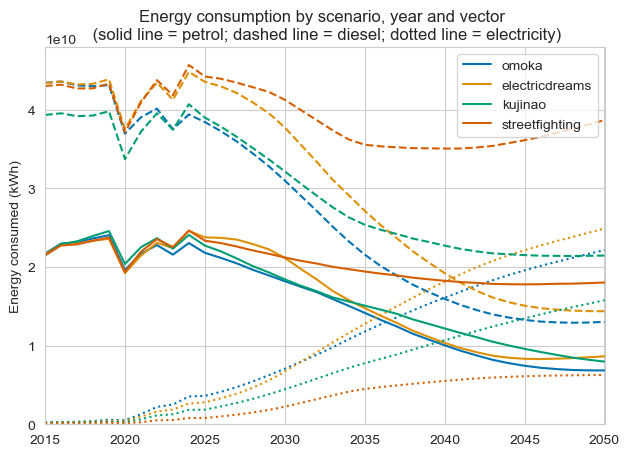

In [22]:
# do it again but in terms of energy (kWh)?

fig, ax = plt.subplots()
clrs = sns.color_palette('colorblind')

lnstls = ['-','--',':','.-']
cnt = 0
for scenario in scenarios:
    lnstl_cnt = 0
    
    for fuelID in [1,2,12]:
        
        if fuelID == 1:
            chart_data_by_fuel[scenario][fuelID] = [c * 9.7 for c in chart_data_by_fuel[scenario][fuelID]]
        elif fuelID == 2:
            chart_data_by_fuel[scenario][fuelID] = [c * 10.7 for c in chart_data_by_fuel[scenario][fuelID]]
        
        if (lnstl_cnt == 0):
            ax.plot(range(2015, 2051), chart_data_by_fuel[scenario][fuelID], color=clrs[cnt], label=scenario.lower(), linestyle=lnstls[lnstl_cnt])
        else:
            ax.plot(range(2015, 2051), chart_data_by_fuel[scenario][fuelID], color=clrs[cnt], linestyle=lnstls[lnstl_cnt])
        
        lnstl_cnt += 1
    cnt += 1
    
ax.legend()
ax.set_ylabel('Energy consumed (kWh)')
ax.set_ylim(bottom=0)
ax.set_xlim(left=2015, right=2050)
ax.set_title('Energy consumption by scenario, year and vector \n (solid line = petrol; dashed line = diesel; dotted line = electricity)')

fig.tight_layout()
plt.savefig('energy-consumption-by-vector-kWh.pdf')

In [24]:
cal = return_calorificvalues()
cal

,FuelID,FuelTypeID,FuelAB,FuelNA,Condition,DenomUnit,Density_kg,CalValue_MJ
0,1,1,GAS,Gasoline,NaN,l,0.74500,32.1840
1,2,1,DIESEL,Diesel,NaN,l,0.83200,35.8600
2,3,1,GAS_IMP,Improved Gasoline,NaN,l,0.74500,32.1840
3,4,1,DIE_IMP,Improved Diesel,NaN,l,0.83200,35.8600
4,5,1,LPG,Liquified Petroleum Gas,NaN,l,0.55000,25.3000
5,6,3,MEOH,Biomethanol,NaN,l,0.79300,15.7800
6,7,3,E85,Bioethanol(85)-petrol(15) blend,NaN,l,0.78700,23.0200
7,8,3,B100,"Biodiesel (FT, synthetic)",NaN,l,0.78000,34.3200
8,10,2,CNG,Compressed Natural Gas,200 bar (20 MPa),l,0.17400,8.3000
9,11,3,CBG,Compressed Bio Gas,200 bar (20 MPa),l,0.17400,8.3000


In [28]:
# return normalised to calorific value
energy_by_scenario = {}

for scenario in scenarios:
    
    consumption = return_energy_consumption(scenario)
        
    energy_by_year = {}
    for year in years:
        
        energy_by_vector = {}
        for fuelID in consumption.FuelID.unique():
            
            fuel_consumed = consumption[(consumption['Year'] == year) & (consumption['FuelID'] == fuelID)]['VEEMQF_Value'].sum() * 1e6  # litres or kWh
            
            # convert to ENERGY (MJ)
            fuel_consumed *= cal[cal.FuelID == fuelID].CalValue_MJ.item() / 1e9 # PJ
            
            energy_by_vector[fuelID] = fuel_consumed
            
        energy_by_year[year] = energy_by_vector
            
    energy_by_scenario[scenario] = energy_by_year

In [29]:
chart_data_total = {}

for scenario in scenarios:
    
    series = []
    for year in years:
        series.append(sum(energy_by_scenario[scenario][year].values()))
    
    chart_data_total[scenario] = series
    

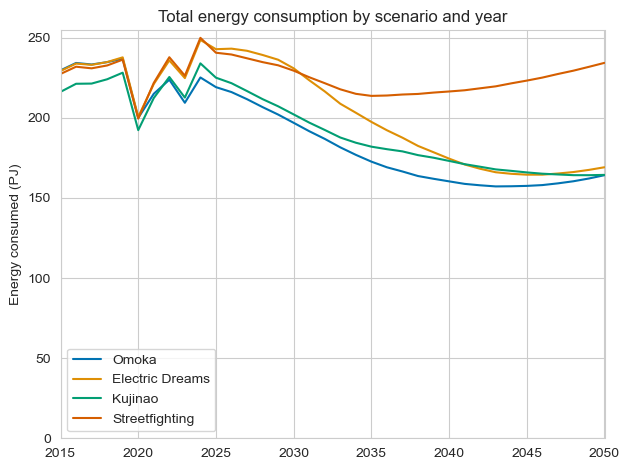

In [30]:
# do it again but in terms of energy MJ for all vectors
legend_labels = {'omoka':'Omoka', 'electricdreams': 'Electric Dreams', 'kujinao': 'Kujinao', 'streetfighting': 'Streetfighting'}

fig, ax = plt.subplots()
clrs = sns.color_palette('colorblind')

lnstls = ['-','--',':','.-']
cnt = 0
for scenario in scenarios:
    ax.plot(range(2015,2051), chart_data_total[scenario], label=legend_labels[scenario.lower()], color=clrs[cnt])
    cnt+=1
        
ax.legend()
ax.set_ylabel('Energy consumed (PJ)')
ax.set_ylim(bottom=0)
ax.set_xlim(left=2015, right=2050)
ax.set_title('Total energy consumption by scenario and year')

fig.tight_layout()
plt.savefig('energy-consumption-by-vector-totalPJ.pdf')

In [34]:
# stacked bar chart!

energy_by_scenario

{'OMOKA': {2015: {1: 72.05780967005546,
   12: 0.0007575610162414511,
   2: 145.60917391941956,
   10: 1.1126428927019238,
   5: 0.9449335635820885,
   15: 9.42228238814732,
   7: 0.09547241672505118,
   8: 0.28189585346572105,
   14: 0.0707961050987244,
   13: 0.0},
  2016: {1: 76.30373610037017,
   12: 0.0009095396075921087,
   2: 146.14601588006255,
   10: 1.095290361409634,
   5: 0.9314156945079571,
   15: 9.195489451738906,
   7: 0.1130709686561788,
   8: 0.32932690820177996,
   14: 0.08776682368516918,
   13: 1.3904162528888266e-09},
  2017: {1: 76.82743969354024,
   12: 0.001133073040752845,
   2: 144.49221125291788,
   10: 1.0695274334213236,
   5: 0.9143656808687503,
   15: 9.356205668162971,
   7: 0.124337471785954,
   8: 0.3609982360086591,
   14: 0.1003120131969452,
   13: 2.7649296043819043e-09},
  2018: {1: 78.4432001541648,
   12: 0.0014901833089881519,
   2: 144.11720720298715,
   10: 1.0540561284013559,
   5: 0.9087240672498933,
   15: 9.553599807789265,
   7: 0.135094